Big Picture View – A brief explanation of the problem:

This is a binary classification project (disease vs. no disease) based on symptoms
and clinical features. The problem aims to detect heart disease early, which is one of
the leading causes of death worldwide. Early detection helps reduce mortality and
enables timely treatment.

Our approach focuses on predicting whether a patient is likely to have heart disease
(1) or not (0). We will use binary classification algorithms such as Logistic
Regression, Naive Bayes, K-Nearest Neighbors (KNN), and Decision Trees, and
compare their accuracy and Model Tuning (optimization).

Initial data analysis:

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

In [51]:
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol',
    'fbs', 'restecg', 'thalach', 'exang',
    'oldpeak', 'slope', 'ca', 'thal', 'target'
]

df = pd.read_csv("../datasets/heart_disease_cleaned.csv")
df = pd.read_csv("../datasets/processed.cleveland.data",header=None, names=column_names,na_values='?')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [52]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


1. How big is your dataset? (in terms of MB)

In [53]:
import os
import sys

# حساب حجم الذاكرة التي يشغلها الـ DataFrame df في الذاكرة بالبايت
memory_bytes = df.memory_usage(deep=True).sum()

# تحويل الحجم من بايت إلى ميجابايت
memory_mb = memory_bytes / (1024 * 1024)

print(f"حجم الذاكرة Ram المستخدم من DataFrame: {memory_mb:.3f} MB")

file_path = "../datasets/heart_disease_cleaned.csv"  # أو مسار الملف الكامل
file_size_mb = os.path.getsize(file_path) / (1024 * 1024)
print(f"حجم الملف على القرص: {file_size_mb:.3f} MB")


حجم الذاكرة Ram المستخدم من DataFrame: 0.032 MB
حجم الملف على القرص: 0.013 MB


2. How many entries does it have?
3. How many features does it have?

In [54]:
# عرض معلومات عامة عن الأعمدة والأنواع وعدد القيم غير الفارغة
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


عدد السمات (أو الخصائص أو المتغيرات أو الأعمدة) في مجموعة البيانات heart_disease_cleaned.csv هو:

🟢 13 Features

Age, Sex, Chest Pain Type (cp), Resting Blood Pressure (trestbps),
Cholesterol (chol),
Fasting Blood Sugar (fbs), Resting ECG Results (restecg), Maximum Heart
Rate Achieved (thalach),
Exercise Induced Angina (exang), ST Depression (oldpeak), Slope of ST
Segment (slope),
Number of Major Vessels (ca), Thalassemia Test Result (thal)


In [55]:
# شكل البيانات (عدد الصفوف والأعمدة)
print(df.shape,type(df.shape))
# shape method provides information about the number of rows and columns in a DataFrame quickly and easily

# عدد السجلات (المدخلات)
num_records = df.shape[0]
print(f"عدد السجلات: {num_records} سجلًا (صفًا)")

# عدد السمات (الخصائص/المتغيرات)
num_features = df.shape[1]
print(f"عدد السمات: {num_features} سمات (أعمدة)")

(303, 14) <class 'tuple'>
عدد السجلات: 303 سجلًا (صفًا)
عدد السمات: 14 سمات (أعمدة)


4. Does it contain any categorical data?

In [56]:
#In Python (exactly in the Pandas Library):
# The column that contains texts or categories is often classified as Object type

categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print(f"الأعمدة التصنيفية: {categorical_columns}")
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"الأعمدة التصنيفية: {categorical_columns}")

الأعمدة التصنيفية: Index([], dtype='object')
الأعمدة التصنيفية: []


In [57]:
# عدد القيم الفريدة في الأعمدة التصنيفية
print(df['sex'].value_counts())
print()

sex
1.0    206
0.0     97
Name: count, dtype: int64



5. Is there any missing value

In [58]:
missing_values = df.isnull().sum()
print(missing_values)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64


In [59]:
has_missing = df.isnull().values.any()
print(f"هل توجد قيم مفقودة؟ {'نعم توجد' if has_missing else 'لا توجد'}")

هل توجد قيم مفقودة؟ نعم توجد


6. What are some basic statistics you can learn right away about this dataset?

In [60]:
#Here are some statistics for the numerical columns:
#المتوسطات والانحرافات المعيارية لكل من age, bmi, children, charges.
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


### Statistical Observations

The age values range from 18 to 64 years, and there are no negative or missing values, indicating clean data.

The BMI (Body Mass Index) is centered around 30, suggesting many individuals fall into the overweight category. Some high outliers are present as well.

The number of children ranges from 0 to 5, providing a diverse distribution of family sizes.

The charges column (annual medical costs) is significantly right-skewed, meaning most patients pay moderate fees, but a few individuals incur very high expenses, possibly due to smoking or serious medical conditions.

رسم correlation matrix.

7. Plot out all correlations among the features.

In [61]:
correlation = df.corr()
print("Correlation Matrix:\n")
correlation
# حساب مصفوفة الارتباط

# مصفوفة الارتباط تُظهر العلاقة بين المتغيرات الرقمية فقط

Correlation Matrix:



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.097542,0.104139,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.362605,0.127389,0.222853
sex,-0.097542,1.000000,0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.093185,0.380936,0.224469
cp,0.104139,0.010084,1.000000,-0.036077,0.072319,-0.039975,0.067505,-0.334422,0.384060,0.202277,0.152050,0.233214,0.265246,0.407075
trestbps,0.284946,-0.064456,-0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.098773,0.133554,0.157754
chol,0.208950,-0.199915,0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.119000,0.014214,0.070909
fbs,0.118530,0.047862,-0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.145478,0.071358,0.059186
restecg,0.148868,0.021647,0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.128343,0.024531,0.183696
thalach,-0.393806,-0.048663,-0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.264246,-0.279631,-0.415040
exang,0.091661,0.146201,0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.145570,0.329680,0.397057
oldpeak,0.203805,0.102173,0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.295832,0.341004,0.504092


Text(0.5, 1.0, 'Correlation Matrix Between numerical Features')

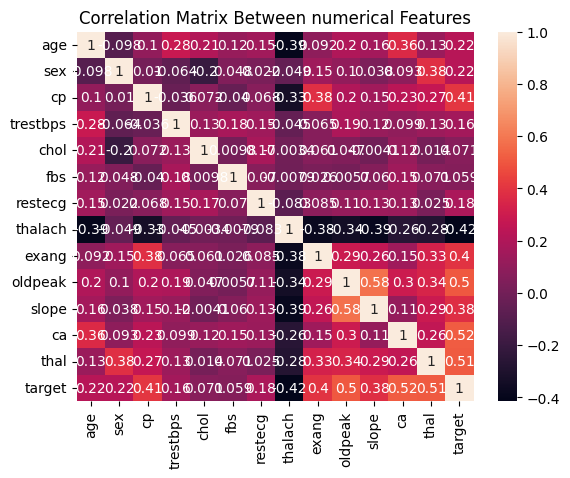

In [62]:
sns.heatmap(correlation,annot=True)
plt.title('Correlation Matrix Between numerical Features')

# Visualize the data

It's interesting to investigate the distribution of the various features. We can use the plotting
functionality of Pandas to create histograms:

<Axes: >

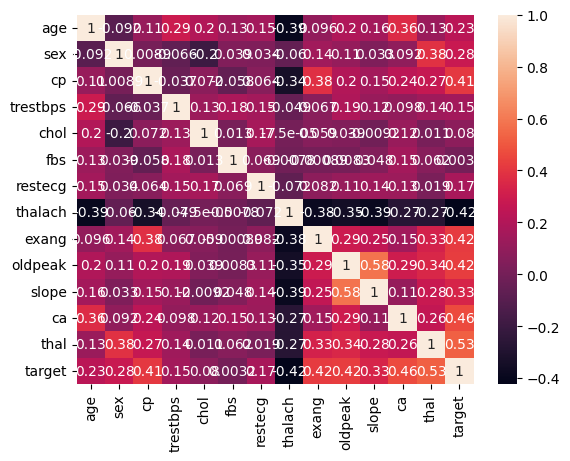

In [63]:
sns.heatmap(corrall, annot=True)

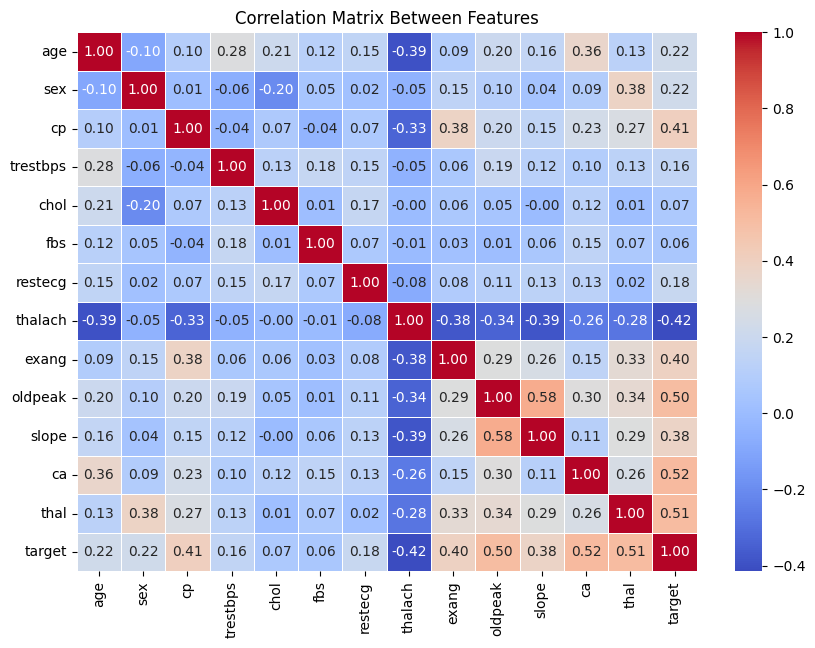

In [64]:
# رسم خريطة الارتباطات
plt.figure(figsize=(10, 7))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Between Features')
plt.show()

Distribution of Age

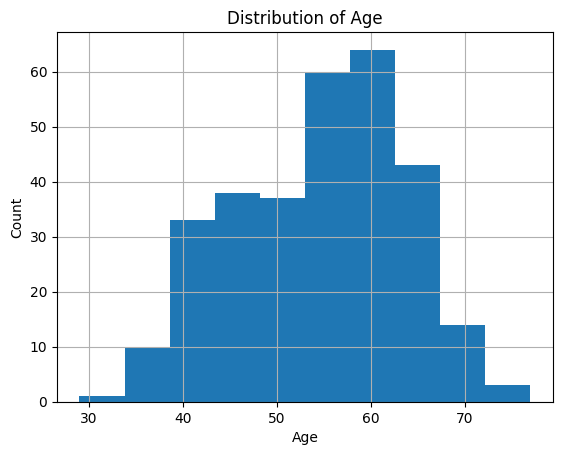

In [65]:
feat = 'age'
df[feat].hist()
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()